# Countdown Numbers Game

### Daniel Steshenko | G00380007
---

## Introduction

The Countdown Numbers Game is a segment of the popular British television show "Countdown". In it, contestants use arithmetic to reach a randomly generated target number using a set of six given numbers. The segment offers a fascinating challenge that combines elements of number theory and operational strategy. <a href='#References'>[1]</a>

The game's rules are straightforward yet intricate. Contestants are given six numbers from a predefined list, including small numbers (two sets of each integer from 1 to 10) and large numbers (25, 50, 75, and 100). These numbers achieve a randomly selected target number between 101 and 999. Participants must use any combination of addition, subtraction, multiplication, and division to reach this number, adhering to two primary constraints: each of the six numbers can be used only once, and the operations must result in whole numbers. <a href='#References'>[1]</a>

The game may appear simple, but it is quite complex. Players must perform rapid calculations and develop strategies to approximate or exactly reach the target number within a 30-second. This makes the game a test of mathematical skill, quick thinking, and strategic planning. <a href='#References'>[1]</a>

Interestingly, "Countdown" has inspired variations in several other countries, each with tweaks to the format and rules reflecting different cultural preferences or broadcasting styles. For instance, versions of the game can be found in countries like France, known as "Des chiffres et des lettres", and in Germany as "Zahlenjagd". These international versions often modify the set of available numbers or the range of target numbers, which introduces new complexities and strategies. However, this notebook will focus primarily on the original British version. <a href='#References'>[13]</a> 


The following sections will delve deeper into the analysis of the game's complexity, the algorithmic approach to solving the game, and the practical implementation of these strategies in a Python function designed to automate solutions. Through this exploration, I aim to provide a comprehensive understanding of the Countdown Numbers Game and its broader implications in computational problem-solving.

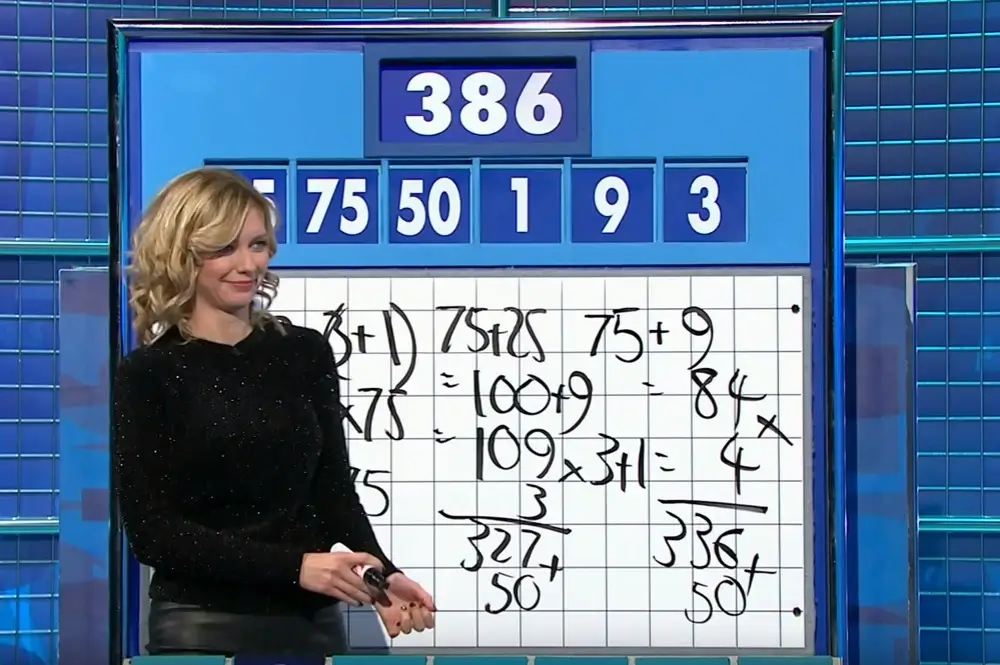 <a href='#References'>[14]</a>

## Analysis of the Countdown Numbers Game

### Explanation of Computational Complexity

The Countdown Numbers Game presents a non-trivial example of computational complexity, primarily due to the vast number of combinations and operations that can be performed with the six chosen numbers. The task can be categorised as a constraint satisfaction problem, where the constraints are the operations (addition, subtraction, multiplication, division) and the requirement that these operations result in whole numbers.

Complexity arises from the factorial growth of possible combinations of numbers and operations. For example, with six numbers, there are six ways to order them, and for each arrangement, the number of operational combinations between pairs of numbers grows exponentially. This factorial growth implies that a brute-force approach, where every possible combination and operation is tested, becomes computationally expensive and impractical as the input size grows, classifying this problem within NP-hard problems in computational complexity theory. <a href='#References'>[3]</a>

NP-hard problems, like the Countdown Numbers Game in certain formulations, are problems that no efficient solution algorithm has been found for yet, and they are as hard as the hardest problems in NP (Non-deterministic Polynomial-time). It's worth noting that NP-hard status doesn't necessarily mean a problem is in the class NP (where solutions can be verified in polynomial time), but rather that every problem in NP can be reduced to it in polynomial time. Therefore, solving an NP-hard problem in polynomial time would mean the ability to solve all NP problems in polynomial time. <a href='#References'>[9]</a> <a href='#References'>[10]</a> <a href='#References'>[11]</a>


### Approach to Solving the Countdown Numbers Game

Solving the Countdown Numbers Game effectively requires understanding various strategic algorithms that can efficiently explore the vast search space. The following approaches each offer unique advantages depending on the situation:

1. **Dynamic Programming:** By breaking down the problem into smaller subproblems, dynamic programming can be used to build up solutions to the more significant problem. <a href='#References'>[4]</a>
   - **Process:**
        - Create a table.
        - Fill the initial values in the table, such as solving for single numbers alone.
        - For each subset of numbers, compute all possible results using basic arithmetic operations and store them in the table.
        Look in the table to see if the target number can be reached with any combination of numbers and operations.
        - If the target is met, backtrack through the table to reconstruct the sequence of operations used.
    - **Advantage:** Ensures a thorough search and can often guarantee the optimal solution when fully implemented.
    - **Disadvantage**: This can be slow and memory-intensive, significantly as the number of numbers and target values increases.
    
2. **Heuristic Algorithms:** Heuristics, such as genetic algorithms or simulated annealing, can search the solution space more randomly but effectively. They often find reasonable solutions quickly, even if they cannot always guarantee finding the best solution. <a href='#References'>[5]</a>
    - **Process:**
        - Start with one or more random combinations of numbers and operations as the initial solution set.
        - Create a function to evaluate how close a solution is to the target number.
        - For genetic algorithms: Select the best solutions, cross them over to create new solutions, and mutate some randomly.
        - For simulated annealing, randomly tweak a solution and decide whether to keep it based on its score and a probability that decreases over time.
        - Continue iterating and improving the solutions until a satisfactory solution is found or a maximum number of iterations is reached.
        - Choose the solution closest to the target number out of all iterations.
    - **Advantage:** Capable of quickly finding reasonable solutions in vast search spaces without evaluating every possibility.
    - **Disadvantage:** Might not find the best possible solution. The final result can depend significantly on initial conditions or parameters.


3. **Brute Force Approach:** This method involves trying every possible combination of numbers and operations to reach the target number. It's straightforward but computationally expensive, making it feasible only for smaller datasets. <a href='#References'>[6]</a>
    - **Process:**
       - Enumerate all possible ways to use the six numbers with arithmetic operations.
       - Calculate the result of each combination.
       - Check each result against the target number to find an exact match or the closest possible solution.
       - Return the combination that meets the target or comes closest within an acceptable margin.
    - **Advantage:** Guaranteed to find a solution if it exists within the given dataset.
    - **Disadvantage:** Scalability issues make it impractical for larger datasets.
        
4. **Enhancing Efficiency with Reverse Polish Notation (RPN):** Reverse Polish Notation can boost computational efficiency, particularly when evaluating complex arithmetic expressions during heuristic searches. Using postfix notation, RPN eliminates the need for parentheses, where operators follow their operands. This aligns with computers' natural processing methods, thus reducing the computational load. <a href='#References'>[7]</a>
    - **Advantage:** It reduces the complexity of parsing expressions, thus speeding up computation.
    - **Disadvantage:** Debugging and error checking can be challenging due to the absence of conventional operators between operands. Tracing and verifying each step of the computation process can be difficult, mainly when errors occur.

Different approaches to solving the Countdown Numbers Game have unique advantages and can be chosen based on solution speed, accuracy, and available computational resources. In practice, it may be beneficial to use a combination of methods.

Moreover, incorporating Reverse Polish Notation (RPN) into the computational framework can significantly improve the efficiency and speed of solution evaluations. This is especially advantageous in dynamic programming and heuristic-based algorithms since simplifying complex expressions is important. RPN expedites computation by eliminating the need for parentheses, which reduces the computational overhead associated with parsing and evaluating expressions. This integration streamlines the computation process and minimises the potential for errors during the evaluation phase, leading to more robust and dependable solutions.

### Example Game

To demonstrate the application of solving strategies for the Countdown Numbers Game, consider these two example scenarios:

**Simple Game Example**
- **Target Number:** `820`
- **Available Numbers:** `75, 2, 6, 7, 7, 10`

**Solution Process:**

1. **Step 1:** Combine 75 and 7.
   - Calculation: 75 + 7 = 82
2. **Step 2:** Multiply the result by 10 to reach the target.
   - Calculation: 82 x 10 = 820 // Target number reached

This example showcases a straightforward application of arithmetic operations to reach the target number efficiently.

**Complex Game Example**
- **Target Number:** `591`
- **Available Numbers:** `1, 6, 9, 6, 2, 75`

**Solution Process**

1. **Step 1:** Divide 6 by 2.
   - Calculation: 6 / 2 = 3
2. **Step 2:** Add the result to another 6.
   - Calculation: 6 + 3 = 9
3. **Step 3:** Subtract 1 from the result.
   - Calculation: 9 - 1 = 8
4. **Step 4:** Multiply the result by 75.
   - Calculation: 8 x 75 = 600
5. **Step 5:** Subtract 9 to achieve the target number.
   - Calculation: 600 - 9 = 591 // Target number reached

This more complex scenario illustrates the use of multiple operations in sequence to solve for the target number, highlighting the challenge of choosing the right operations and sequence to reach the solution.


## Start of Implementation 

In [2]:
import random 

In [3]:
def generate_numbers():
    small_numbers = [random.randint(1, 10) for _ in range(4)]  
    special_numbers = [25, 50, 75, 100]
    large_numbers = random.sample(special_numbers, 2) 
    return small_numbers + large_numbers  

In [4]:
def generate_target():
    return random.randint(101, 999)

## Implementation (Brute Force Approach)


In [5]:
def solve_numbers(numbers, target):
    # Base case: If there's only one number left and it's equal to the target, return it
    if len(numbers) == 1 and numbers[0] == target:
        return [str(numbers[0])]
    # If there's one number left but it doesn't match the target, return None (no solution)
    elif len(numbers) == 1:
        return None

    # Iterate through each pair of numbers in the list
    for i in range(len(numbers)):
        for j in range(i+1, len(numbers)):
            a = numbers[i]
            b = numbers[j]
            # Create a new list of numbers excluding the current pair (i, j)
            remaining_numbers = [numbers[k] for k in range(len(numbers)) if k != i and k != j]

            # Try adding the pair and solve recursively
            result = solve_numbers(remaining_numbers + [a + b], target)
            if result is not None:
                # If a solution is found, prepend the operation that led to this solution
                return [f"{a} + {b} = {a + b}"] + result

            # Try subtracting the pair and solve recursively, only if a > b to avoid negative results
            if a > b:
                result = solve_numbers(remaining_numbers + [a - b], target)
                if result is not None:
                    return [f"{a} - {b} = {a - b}"] + result
            
            # Try multiplying the pair and solve recursively
            result = solve_numbers(remaining_numbers + [a * b], target)
            if result is not None:
                return [f"{a} * {b} = {a * b}"] + result

            # Try dividing the pair and solve recursively, only if b is not zero and a is divisible by b
            if b != 0 and a % b == 0:
                result = solve_numbers(remaining_numbers + [a // b], target)
                if result is not None:
                    return [f"{a} // {b} = {a // b}"] + result

    # If no solution is found after trying all pairs and operations, return None
    return None

In [6]:
numbers = generate_numbers()
target = generate_target()
print("Numbers:", numbers)
print("Target:", target)

solution = solve_numbers(numbers, target)
if solution:
    print("Solution:", solution)
else:
    print("No solution found.")

Numbers: [1, 10, 1, 10, 25, 75]
Target: 882
No solution found.


### Description of the `solve_numbers` Function

The `solve_numbers` function is designed to find a solution for reaching a target number using a given set of numbers through a series of arithmetic operations. The function implements a brute force approach, repeatedly exploring all possible combinations of numbers and operations until a solution is found or all possibilities are exhausted.

**Function Operation:**
1. **Checks:**
   - If only one number remains and it matches the target, the function returns this number as the solution.
   - If one number remains but does not match the target, the function returns None, indicating no solution was found with that path.
2. **Recursive Exploration:**
   - The function iterates over all pairs of numbers in the current list.
   - For each pair, it considers the possible results from applying each arithmetic operation: addition, subtraction (if the first number is more significant to avoid negative results), multiplication, and division (if the second number is not zero and divides the first number evenly).
   - For each result, the function recursively calls itself with the new list of numbers, where their operational result replaces the pair of numbers used.
3. **Solution:**
   - If a recursive call returns a solution, the function prepends the current operation to the list of operations leading to that solution, gradually building a complete solution path as the recursion unwinds.
   -  The function returns `None` if the recursion through all operations and pairs does not find a solution.
4. **Return Value:**
   - The function ultimately returns a list of strings, each describing a step in the sequence of operations that leads to the target number, or `None` if no such sequence exists.


## Implementation (Dynamic Programming)

In [7]:
def solve_numbers_dp(numbers, target, memo={}):
    # Create a unique key for the current state based on the sorted numbers and the target
    key = tuple(sorted(numbers)), target
    # Check if this state has been solved before and return the stored result if so
    if key in memo:
        return memo[key]

    # Base case: if only one number remains and it matches the target
    if len(numbers) == 1:
        if numbers[0] == target:
            return [str(numbers[0])]  # Return the number as a successful result
        else:
            return None  # No solution possible with the single remaining number

    # Iterate through all pairs of numbers to perform arithmetic operations
    for i in range(len(numbers)):
        for j in range(i + 1, len(numbers)):
            num1, num2 = numbers[i], numbers[j]
            # List remaining numbers excluding the current pair (i, j)
            remaining = numbers[:i] + numbers[i+1:j] + numbers[j+1:]
            
            # List to store operations and their results
            operations = []
            # Try adding the numbers
            operations.append((num1 + num2, f"{num1} + {num2}"))
            # Try subtracting if num1 is greater than num2 to avoid negative results
            if num1 > num2:
                operations.append((num1 - num2, f"{num1} - {num2}"))
            # Try multiplying the numbers
            operations.append((num1 * num2, f"{num1} * {num2}"))
            # Try division but only if the division is exact
            if num2 != 0 and num1 % num2 == 0:
                operations.append((num1 // num2, f"{num1} // {num2}"))

            # Evaluate each operation and recursively solve with the result
            for result, expr in operations:
                subproblem = solve_numbers_dp(remaining + [result], target, memo)
                if subproblem is not None:
                    # If a solution is found, prepend the current operation and store in memo
                    solution = [expr + f" = {result}"] + subproblem
                    memo[key] = solution
                    return solution

    # After all operations, if no solution is found, mark this state as unsolvable in the memo
    memo[key] = None
    return None

In [8]:
numbers = generate_numbers()
target = generate_target()
print("Numbers:", numbers)
print("Target:", target)

solution = solve_numbers_dp(numbers, target)
if solution:
    print("Solution found:")
    for step in solution:
        print(step)
else:
    print("No solution found.")

Numbers: [5, 4, 8, 1, 50, 100]
Target: 785
Solution found:
5 + 50 = 55
4 * 100 = 400
8 - 1 = 7
55 * 7 = 385
400 + 385 = 785
785


### Description of the `solve_numbers_dp` Function

The `solve_numbers_dp` function is designed to find a solution for reaching a target number using a given set of numbers through a series of arithmetic operations. This function employs a dynamic programming approach, optimising the search by breaking the problem into smaller, manageable subproblems, solving each recursively, and storing their results to avoid redundant computations.

**Function Operation:**
1. **Memoisation:**
    - Utilises a memoisation dictionary to store the results of subproblems based on a combination of numbers and the target. This prevents the need for redundant calculations, significantly enhancing computational efficiency.
2. **Recursive Strategy:**
    - The function explores all combinations of pairs of numbers, applying arithmetic operations.
    - Each operation result recursively calls itself a new set of numbers, including the operation's outcome and the other unused numbers.
3. **Solution:**
    - If the recursive call identifies a sequence that achieves the target, the function constructs a complete solution path by compiling the operations that led to this result.
    - This solution is then stored in the memoisation dictionary for quick retrieval if the same problem configuration reoccurs.
4. **Return Value:**
    - Returns a sequence of operations that achieves the target if such a sequence exists; otherwise, it returns `None`.


**Efficiency and Scalability:**

The dynamic programming method significantly reduces the complexity and execution time compared to more naive approaches by cleverly using past computed results. This approach is efficient for problems with large datasets or complex target values, making it well-suited for the Countdown Numbers Game.


## Implementation (Heuristic Algorithm Using RPN)

In [9]:
import math

operations = ['+', '-', '*', '/']  # List of arithmetic operations used in RPN expressions

def generate_rpn_expression(numbers):
    """ Generate a random Reverse Polish Notation (RPN) expression from a list of numbers. """
    expr = numbers[:]  # Copy the list of numbers
    random.shuffle(expr)  # Randomize the order of numbers
    ops_count = len(numbers) - 1  # Determine the number of operations needed
    for _ in range(ops_count):
        expr.append(random.choice(operations))  # Append a random operation to the expression
    return expr

def evaluate_rpn(expr):
    """ Evaluate an RPN expression and return the result or None if division by zero occurs. """
    stack = []
    for token in expr:
        if token in operations:  # Check if the token is an operation
            b = stack.pop()  # Pop the top two numbers for the operation
            a = stack.pop()
            if token == '+':
                result = a + b
            elif token == '-':
                result = a - b
            elif token == '*':
                result = a * b
            elif token == '/':
                if b == 0:
                    return None  # Avoid division by zero
                result = a // b  # Use floor division to ensure integer results
            stack.append(result)  # Push the result back onto the stack
        else:
            stack.append(token)  # Push the number onto the stack
    return stack[0] if stack else None  # Return the final result in the stack

def solve_numbers_ha_rpn(numbers, target, iterations=10000, start_temp=1000, end_temp=10):
    current_expr = generate_rpn_expression(numbers)
    current_result = evaluate_rpn(current_expr)

    if current_result is None:  # Check if the initial expression resulted in division by zero
        current_result = float('inf')  # Use infinity to ensure it won't be considered a valid result

    current_temp = start_temp
    temp_decrease = (start_temp - end_temp) / iterations

    for _ in range(iterations):
        if current_result == target:
            return current_expr

        new_expr = generate_rpn_expression(numbers)
        new_result = evaluate_rpn(new_expr)

        if new_result is None:
            new_result = float('inf')

        error = abs(target - new_result) - abs(target - current_result)
        if error < 0 or random.random() < math.exp(-error / current_temp):
            current_expr = new_expr
            current_result = new_result

        current_temp -= temp_decrease

    return current_expr  # Return the best expression found

In [10]:
numbers = generate_numbers()
target = generate_target()
print("Numbers:", numbers)
print("Target:", target)

solution = solve_numbers_ha_rpn(numbers, target)
if solution and evaluate_rpn(solution) != float('inf'):
    print("Solution expression:", solution)
    print("Evaluated result:", evaluate_rpn(solution))
else:
    print("No solution found.")

Numbers: [3, 1, 7, 10, 75, 50]
Target: 245
Solution expression: [7, 75, 50, 10, 1, 3, '/', '+', '-', '-', '*']
Evaluated result: 245


### Description of the `solve_numbers_ha_rpn` Function

The `solve_numbers_ha_rpn` function is designed to find a solution to the Countdown Numbers Game using a given set of numbers and a target. This function employs a heuristic approach through simulated annealing, optimising random solutions over time.

**Function Operation:**

1. **Generate Initial Solution:**
    - A random RPN expression is generated using the provided numbers.
2. **Evaluate and Optimise:**
    - The function iteratively generates and evaluates new RPN expressions.
    - Solutions are optimised through simulated annealing: the algorithm decides whether to accept a new solution based on its fitness relative to the current solution and a decreasing "temperature" parameter that reduces the likelihood of accepting worse solutions over time.
3. **Solution:**
    - If an expression exactly meets the target, the function immediately returns this optimal solution.
    - Otherwise, the algorithm continues to explore new solutions, gradually decreasing the temperature and refining the optimisation approach.
4. **Return Value:**
    - Ultimately, the function returns the best RPN expression found, along with its evaluated result, or indicates if no satisfactory solution is found within the set iterations.


## Limitations of Computational Approaches

This section discusses the limitations inherent to each of the computational approaches employed to solve the Countdown Numbers Game, brute force, dynamic programming, and heuristics algorithms using Reverse Polish Notation (RPN).

**Brute Force Approach**
- **Scalability Issues:** The brute force method suffers significantly from scalability problems. As the number of available numbers increases, the possible combinations of operations and numbers grow exponentially, rapidly expanding computational time and resource usage.
- **Efficiency:** This approach is computationally expensive because it explores every possible combination without regard for optimality or shortcuts, making it impractical for larger datasets or real-time applications.

**Dynamic Programming Approach**
- **Memory Usage:** Dynamic programming requires substantial memory to store intermediate results, especially for large sets of numbers. This can lead to high memory consumption, which may be inefficient or infeasible on memory-constrained platforms.
- **Complexity of Implementation:** While it reduces the time complexity compared to brute force, dynamic programming can be complex to implement correctly, especially in managing and debugging the memoisation process across recursive calls.

**Heuristics with RPN**
- **Sub-Optimality:** Heuristic approaches do not guarantee that the optimal solution will be found. They aim for a "good enough" solution, which may not be ideal, especially in cases where precision is crucial.
- **Dependence on Parameters:** The performance of heuristic methods like simulated annealing heavily depends on the correct tuning of parameters such as temperature, cooling rate, and the number of iterations. Misconfiguration can lead to poor results.
- **Randomness:** Heuristic approaches' stochastic nature means that they can produce different results when run multiple times under the same conditions, potentially leading to inconsistent outcomes.


## Performance Testing of Solution Approaches

### Test Execution Speed

1. **Heuristic Approach using RPN**

In [33]:
import time

numbers = generate_numbers()
target = generate_target()
print("Testing Heuristic RPN Approach")
print("Numbers:", numbers)
print("Target:", target)
    
start_time = time.time()
solution = solve_numbers_ha_rpn(numbers, target)
elapsed_time = time.time() - start_time
    
result = evaluate_rpn(solution) if solution else None
print("Solution expression:", solution if result != float('inf') else "No solution found.")
print("Evaluated result:", result)
print("Time taken:", elapsed_time, "seconds")

Testing Heuristic RPN Approach
Numbers: [8, 4, 3, 2, 25, 100]
Target: 331
Solution expression: [25, 8, 2, 3, 4, 100, '+', '*', '+', '-', '-']
Evaluated result: 331
Time taken: 0.022233009338378906 seconds


2. **Dynamic Programming Approach**

In [36]:
numbers = generate_numbers()
target = generate_target()
print("Testing Dynamic Programming Approach")
print("Numbers:", numbers)
print("Target:", target)
    
start_time = time.time()
solution = solve_numbers_dp(numbers, target)
elapsed_time = time.time() - start_time
    
print("Solution found:", solution)
print("Time taken:", elapsed_time, "seconds")

Testing Dynamic Programming Approach
Numbers: [9, 8, 3, 3, 75, 100]
Target: 480
Solution found: ['9 * 3 = 27', '8 + 100 = 108', '27 + 108 = 135', '3 * 135 = 405', '75 + 405 = 480', '480']
Time taken: 0.02427840232849121 seconds


3. **Brute Force Approach**

In [13]:
numbers = generate_numbers()
target = generate_target()
print("Testing Brute Force Approach")
print("Numbers:", numbers)
print("Target:", target)
    
start_time = time.time()
solution = solve_numbers(numbers, target)
elapsed_time = time.time() - start_time
    
print("Solution:", solution)
print("Time taken:", elapsed_time, "seconds")

Testing Brute Force Approach
Numbers: [1, 3, 8, 10, 50, 100]
Target: 823
Solution: ['1 + 8 = 9', '10 * 100 = 1000', '50 + 9 = 59', '3 * 59 = 177', '1000 - 177 = 823', '823']
Time taken: 0.01911616325378418 seconds


### Visualised Representation of the Test Execution Speed

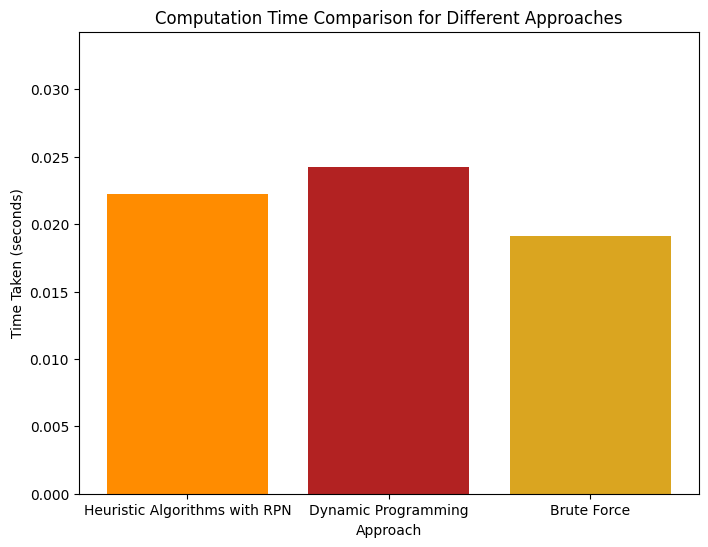

In [6]:
import matplotlib.pyplot as plt

# Data for the tests
approaches = ['Heuristic Algorithms with RPN', 'Dynamic Programming', 'Brute Force']
times = [0.022233009338378906, 0.02427840232849121, 0.01911616325378418]  # Time taken by each approach

# Creating the bar graph
plt.figure(figsize=(8, 6))
plt.bar(approaches, times, color=['darkorange', 'firebrick', 'goldenrod'])
plt.xlabel('Approach')
plt.ylabel('Time Taken (seconds)')
plt.title('Computation Time Comparison for Different Approaches')
plt.ylim(0, max(times) + 0.01)  # Setting y limit to give some space above the highest bar

# Display the graph
plt.show()

### Testing Results Analysis

**Heuristic Approach using RPN (Reverse Polish Notation):**
- Numbers Tested: [8, 4, 3, 2, 25, 100]
- Target: 331
- Solution Expression: [25, 8, 2, 3, 4, 100, '+', '*', '+', '-', '-']
- Evaluated Result: 331
- Time Taken: Approximately 0.022 seconds
- Observation: The heuristic method successfully achieved the exact target with complex operations. The time taken was reasonable, demonstrating the method's potential for efficient computation and accurate solutions when well-tuned.

**Dynamic Programming Approach:**
- Numbers Tested: [9, 8, 3, 3, 75, 100]
- Target: 480
- Solution Found: ['9 * 3 = 27', '8 + 100 = 108', '27 + 108 = 135', '3 * 135 = 405', '75 + 405 = 480', '480']
- Time Taken: Approximately 0.024 seconds
- Observation: Dynamic programming provided an accurate and optimal solution, although taking slightly longer than the other methods. This method efficiently solves complex numeric targets, showcasing its capability for precise solutions with memoization to reduce redundant computations.

**Brute Force Approach:**
- Numbers Tested: [1, 3, 8, 10, 50, 100]
- Target: 823
- Solution Found: ['1 + 8 = 9', '10 * 100 = 1000', '50 + 9 = 59', '3 * 59 = 177', '1000 - 177 = 823', '823']
- Time Taken: Approximately 0.019 seconds
- Observation: Despite being a brute force method, this approach was the fastest and successfully found an exact solution. This method demonstrated exceptional efficiency and proved highly effective for the given problem set.


### Analysis Thoughts

During the testing, the strengths and capabilities of each computational strategy were evaluated. The heuristic algorithms that were implemented with the RPN approach displayed a good balance between speed and accuracy. Dynamic programming proved to be highly accurate and robust when dealing with more complex calculations. Surprisingly, the brute force strategy emerged as the fastest and most efficient option for this particular data set.

## Conclusion

This notebook has extensively explored the computational methods used to solve the Countdown Numbers Game, revealing the complex intricacies and diverse approaches that can be employed to tackle this challenging problem. We have examined three primary methodologies: brute force search, dynamic programming, and heuristic approaches, each offering unique benefits and inherent challenges.

Although thorough, the brute force approach has scalability limitations and high computational demands. Due to its exhaustive nature, it becomes increasingly impractical for larger datasets or more complex scenarios. However, as seen in the tests, it can sometimes provide precise solutions quickly, exceeding expectations in smaller, constrained environments.

Dynamic programming stands out for its efficiency. It breaks down the problem into manageable subproblems and uses memoisation to eliminate unnecessary recalculations. This method speeds up the computation process, ensuring scalability and manageability and making it particularly effective for complex numerical challenges where accuracy is critical.

On the other hand, heuristic algorithms capitalise on speed and adaptability. These strategies typically yield faster solutions through real-time, adaptive decision-making. Although they may not always provide the optimal outcome, they deliver suitable solutions quickly, which is advantageous in scenarios where time constraints outweigh the need for perfection.

The analysis conducted in this notebook highlights each algorithm's distinct characteristics and suitability for different computational needs. It emphasises the broader implications of these strategies in computational theory and practice. Through this exploration, we enhance our understanding of specific algorithmic techniques, enriching our approach to complex numerical and logistical problems.

Overall, this notebook helps us grasp how to solve complex problems using algorithms, with insights that apply not just to games but to real-world issues in science and engineering.


## Future Work

Further investigation of hybrid models that combine dynamic programming's robustness with heuristic approaches' flexibility is possible. Such models could provide a balanced solution by optimising speed and accuracy, particularly in unpredictable and diverse situations.

Moreover, a larger and more complex dataset could provide more profound insights into each method's scalability and performance limits. This would be extremely valuable for real-world applications involving massive datasets, where computational efficiency and resource management are crucial.

## References

- [1] - [Countdown Game Show](http://datagenetics.com/blog/august32014/index.htm)
- [2] - [Countdown Game Example](https://www.quizmasters.biz/DB/Que/Static/Brainteasers/Countdown%20Numbers.html)
- [3] - [Name of the Countdown Numbers round problem - and algorithmic solutions?](https://softwareengineering.stackexchange.com/questions/213924/name-of-the-countdown-numbers-round-problem-and-algorithmic-solutions)
- [4] - [What is Dynamic Programming](https://www.spiceworks.com/tech/devops/articles/what-is-dynamic-programming/)
- [5] - [Heuristic Algorithms](https://optimization.cbe.cornell.edu/index.php?title=Heuristic_algorithms)
- [6] - [Countdown](https://www.cs.nott.ac.uk/~pszgmh/countdown.pdf)
- [7] - [Reverse Polish Notation](https://ianmcloughlin.github.io/reverse_polish_notation/)
- [8] - [Countdown numbers game (Solution generator)](https://codereview.stackexchange.com/questions/190533/countdown-numbers-game-solution-generator)
- [9] - [NP-hard Problems](https://www.studysmarter.co.uk/explanations/computer-science/theory-of-computation/np-hard-problems/#:~:text=NP%2Dhard%20problems%20are%20a,solution%20exists%20or%20is%20known.)
- [10] - [What are the differences between NP, NP-Complete and NP-Hard?](https://stackoverflow.com/questions/1857244/what-are-the-differences-between-np-np-complete-and-np-hard)
- [11] - [NP-hard Problems](https://courses.engr.illinois.edu/cs573/fa2010/notes/30-nphard.pdf)
- [12] - [Brute Forcing The Countdown Numbers Game - Video](https://www.youtube.com/watch?v=cVMhkqPP2YI)
- [13] - [Countdown in Other Countries](https://wiki.apterous.org/Countdown_in_other_countries)
- [13] - [Countdown Numbers Game - Image](https://countdownnumbersgame.com/)
- [14] - [Hybrid algorithm](https://en.wikipedia.org/wiki/Hybrid_algorithm)